In [61]:
import pandas as pd

X_train = pd.read_csv('../data/processed/xtrain.csv')
X_test = pd.read_csv('../data/processed/xtest.csv')
y_train = pd.read_csv('../data/processed/ytrain.csv')
y_test = pd.read_csv('../data/processed/ytest.csv')

In [62]:
y_test.head()

Unnamed: 0  Outcome
0         192        1
1         614        1
2          69        0
3         271        0
4         612        1

In [63]:
X_train.drop("Unnamed: 0", axis=1, inplace=True)
X_test.drop("Unnamed: 0", axis=1, inplace=True)
y_train.drop("Unnamed: 0", axis=1, inplace=True)
y_test.drop("Unnamed: 0", axis=1, inplace=True)

In [64]:
X_train.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            8      176             90             34      300  33.7   
1            3      163             70             18      105  31.6   
2            2      110             74             29      125  32.4   
3            3      100             68             23       81  31.6   
4            2      108             62             10      278  25.3   

   DiabetesPedigreeFunction  Age  
0                     0.467   58  
1                     0.268   28  
2                     0.698   27  
3                     0.949   28  
4                     0.881   22

In [65]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 60, random_state= 11)
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=60, random_state=11)

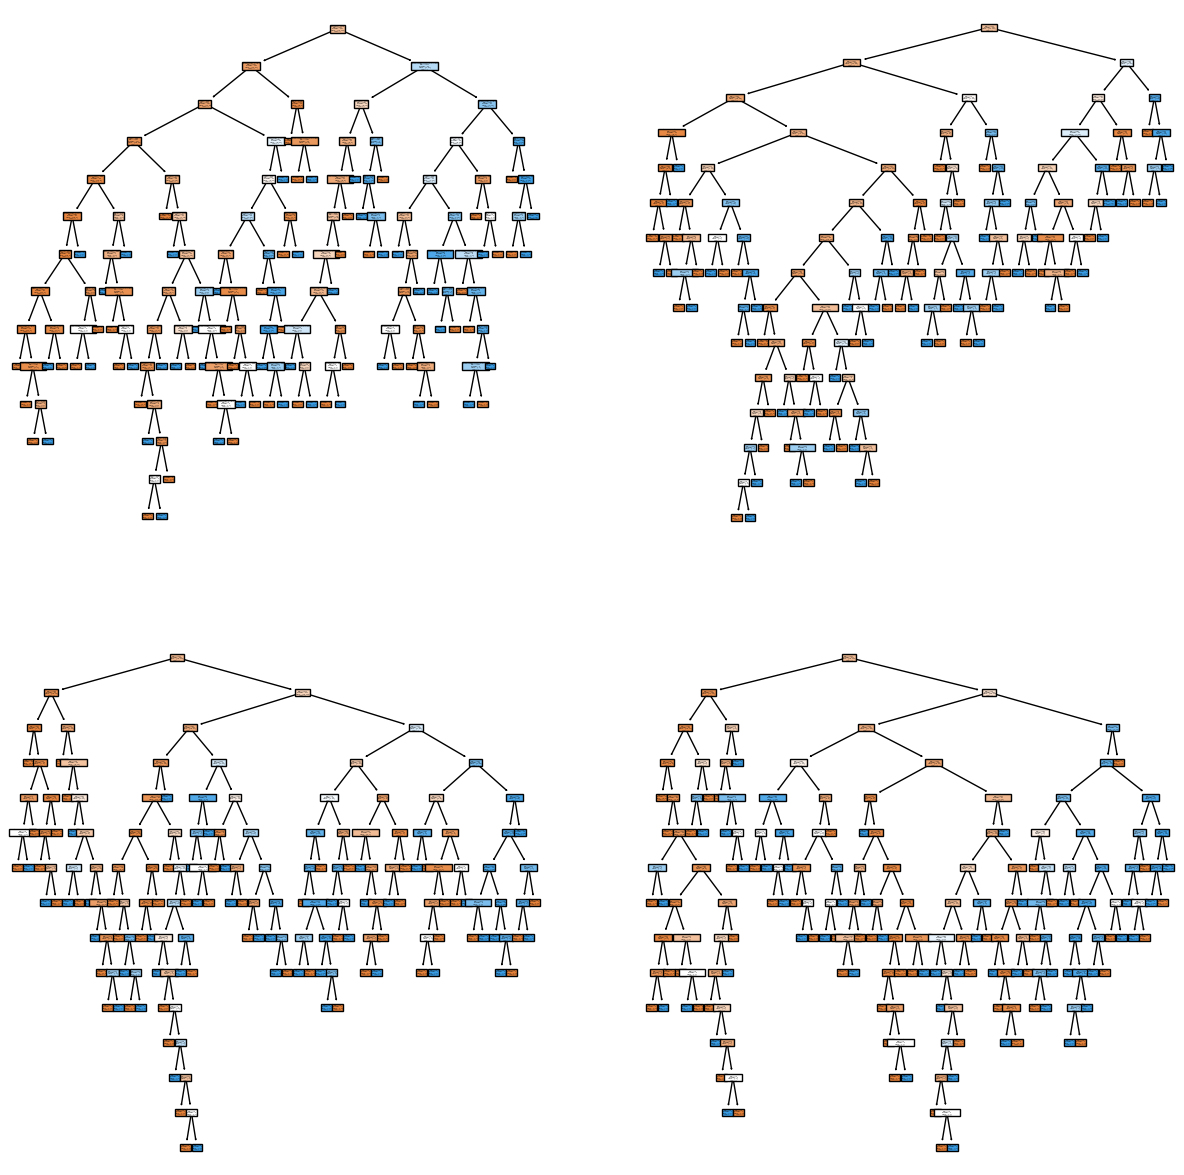

In [66]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots (2, 2, figsize = (15, 15))

tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)

plt.show()

In [67]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [68]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8099173553719008

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier

hyperparams = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [10, 40, 60],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'random_state': [11]
}

# Exhaustive search for hyperparameters:
accs = []
for combination in ParameterGrid(hyperparams):
    model = RandomForestClassifier(**combination)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accs.append(accuracy_score(y_train, y_pred))
# Selection of the best model and final training:

best_acc = max(accs)
best_combination = list(ParameterGrid(hyperparams))[accs.index(best_acc)]
best_model = RandomForestClassifier(**best_combination)
best_model.fit(X_train, y_train)
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight='balanced_subsample',
                                              criterion='entropy', max_depth=20,
                                              max_features='log2',
                                              min_samples_leaf=60,
                                              min_samples_split=10,
                                              random_state=11),
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 40, 60],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100], 'random_state': [11]},
             scoring='accuracy')

In [70]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import ParameterGrid

# hyperparams = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [10, 40, 60],
#     'max_features': [None, 'sqrt', 'log2'],
#     'bootstrap': [True, False],
#     'criterion': ['gini', 'entropy'],
#     'class_weight': [None, 'balanced', 'balanced_subsample'],
#     'random_state': [11]
# }

# accs = []
# for combination in ParameterGrid(hyperparams):
#     model = RandomForestClassifier(combination)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_train)
#     accs.append(accuracy_score(y_train, y_pred))

# best_acc = max(accs)
# best_combination = combination[accs.index(best_acc)]
# best_model = RandomForest(best_combination)
# best_model.fit(X_train, y_train)
# grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
# grid

# from sklearn.model_selection import ParameterGrid
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# hyperparams = {
#      'n_estimators': [10, 50, 100],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'max_features': ['sqrt', 'log2', None]
# }

# # Exhaustive search for hyperparameters:
# accs = []
# for combination in ParameterGrid(hyperparams):
#     model = RandomForestClassifier(**combination)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_train)
#     accs.append(accuracy_score(y_train, y_pred))
# # Selection of the best model and final training:

# best_acc = max(accs)
# best_combination = list(ParameterGrid(hyperparams))[accs.index(best_acc)]
# best_model = RandomForestClassifier(**best_combination)
# best_model.fit(X_train, y_train)
# grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
# grid

In [71]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

Best hyperparameters: {'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 11}


In [72]:
results = pd.DataFrame(grid.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.017039      0.000722         0.003556        0.000297   
1          0.075486      0.004769         0.005654        0.000356   
2          0.136893      0.001181         0.009425        0.002268   
3          0.022507      0.006593         0.004106        0.000952   
4          0.072990      0.004467         0.005559        0.000275   
...             ...           ...              ...             ...   
2911       0.044241      0.001900         0.005337        0.000444   
2912       0.096831      0.014742         0.009744        0.002070   
2913       0.010586      0.000701         0.002965        0.000111   
2914       0.043122      0.001330         0.005039        0.000088   
2915       0.087317      0.003737         0.008569        0.002427   

     param_bootstrap  param_class_weight param_criterion param_max_depth  \
0               True                None            gini            None   
1               True                None            gini            None   
2               True                None            gini            None   
3               True                None            gini            None   
4               True                None            gini            None   
...              ...                 ...             ...             ...   
2911           False  balanced_subsample         entropy              20   
2912           False  balanced_subsample         entropy              20   
2913           False  balanced_subsample         entropy              20   
2914           False  balanced_subsample         entropy              20   
2915           False  balanced_subsample         entropy              20   

     param_max_features param_min_samples_leaf  ... param_random_state  \
0                  None                     10  ...                 11   
1                  None                     10  ...                 11   
2                  None                     10  ...                 11   
3                  None                     10  ...                 11   
4                  None                     10  ...                 11   
...                 ...                    ...  ...                ...   
2911               log2                     60  ...                 11   
2912               log2                     60  ...                 11   
2913               log2                     60  ...                 11   
2914               log2                     60  ...                 11   
2915               log2                     60  ...                 11   

                                                 params split0_test_score  \
0     {'bootstrap': True, 'class_weight': None, 'cri...          0.824742   
1     {'bootstrap': True, 'class_weight': None, 'cri...          0.835052   
2     {'bootstrap': True, 'class_weight': None, 'cri...          0.835052   
3     {'bootstrap': True, 'class_weight': None, 'cri...          0.824742   
4     {'bootstrap': True, 'class_weight': None, 'cri...          0.835052   
...                                                 ...               ...   
2911  {'bootstrap': False, 'class_weight': 'balanced...          0.773196   
2912  {'bootstrap': False, 'class_weight': 'balanced...          0.773196   
2913  {'bootstrap': False, 'class_weight': 'balanced...          0.711340   
2914  {'bootstrap': False, 'class_weight': 'balanced...          0.773196   
2915  {'bootstrap': False, 'class_weight': 'balanced...          0.773196   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.721649           0.783505           0.793814   
1             0.680412           0.773196           0.773196   
2             0.711340           0.783505           0.773196   
3             0.721649           0.783505           0.793814   
4             0.680412           0.773196           0.773196   
...                ...                ...             

In [73]:
grid.best_estimator_

RandomForestClassifier(bootstrap=False, min_samples_leaf=10, random_state=11)

In [74]:
grid.best_params_

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 11}

In [84]:
model = RandomForestClassifier(bootstrap= False, class_weight= None, criterion= 'gini', max_depth = None, max_features= 'sqrt', min_samples_leaf= 10, min_samples_split = 2, n_estimators= 100, random_state= 11)
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(bootstrap=False, min_samples_leaf=10, random_state=11)

In [85]:
y_pred = model.predict(X_train)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [86]:
accuracy_score(y_train, y_pred)

0.8987603305785123

In [87]:
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [88]:
accuracy_score(y_test, y_pred_test)

0.8181818181818182

[Text(0.4287974683544304, 0.9444444444444444, 'BMI <= 28.85\ngini = 0.438\nsamples = 484\nvalue = [327, 157]\nclass = 0'),
 Text(0.18354430379746836, 0.8333333333333334, 'Pregnancies <= 6.5\ngini = 0.236\nsamples = 168\nvalue = [145, 23]\nclass = 0'),
 Text(0.11392405063291139, 0.7222222222222222, 'Glucose <= 118.0\ngini = 0.166\nsamples = 142\nvalue = [129, 13]\nclass = 0'),
 Text(0.05063291139240506, 0.6111111111111112, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.043\nsamples = 92\nvalue = [90, 2]\nclass = 0'),
 Text(0.02531645569620253, 0.5, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]\nclass = 0'),
 Text(0.0759493670886076, 0.5, 'gini = 0.219\nsamples = 16\nvalue = [14, 2]\nclass = 0'),
 Text(0.17721518987341772, 0.6111111111111112, 'Age <= 26.5\ngini = 0.343\nsamples = 50\nvalue = [39, 11]\nclass = 0'),
 Text(0.12658227848101267, 0.5, 'Age <= 21.5\ngini = 0.074\nsamples = 26\nvalue = [25, 1]\nclass = 0'),
 Text(0.10126582278481013, 0.3888888888888889, 'gini = 0.0\nsamples = 13\nval

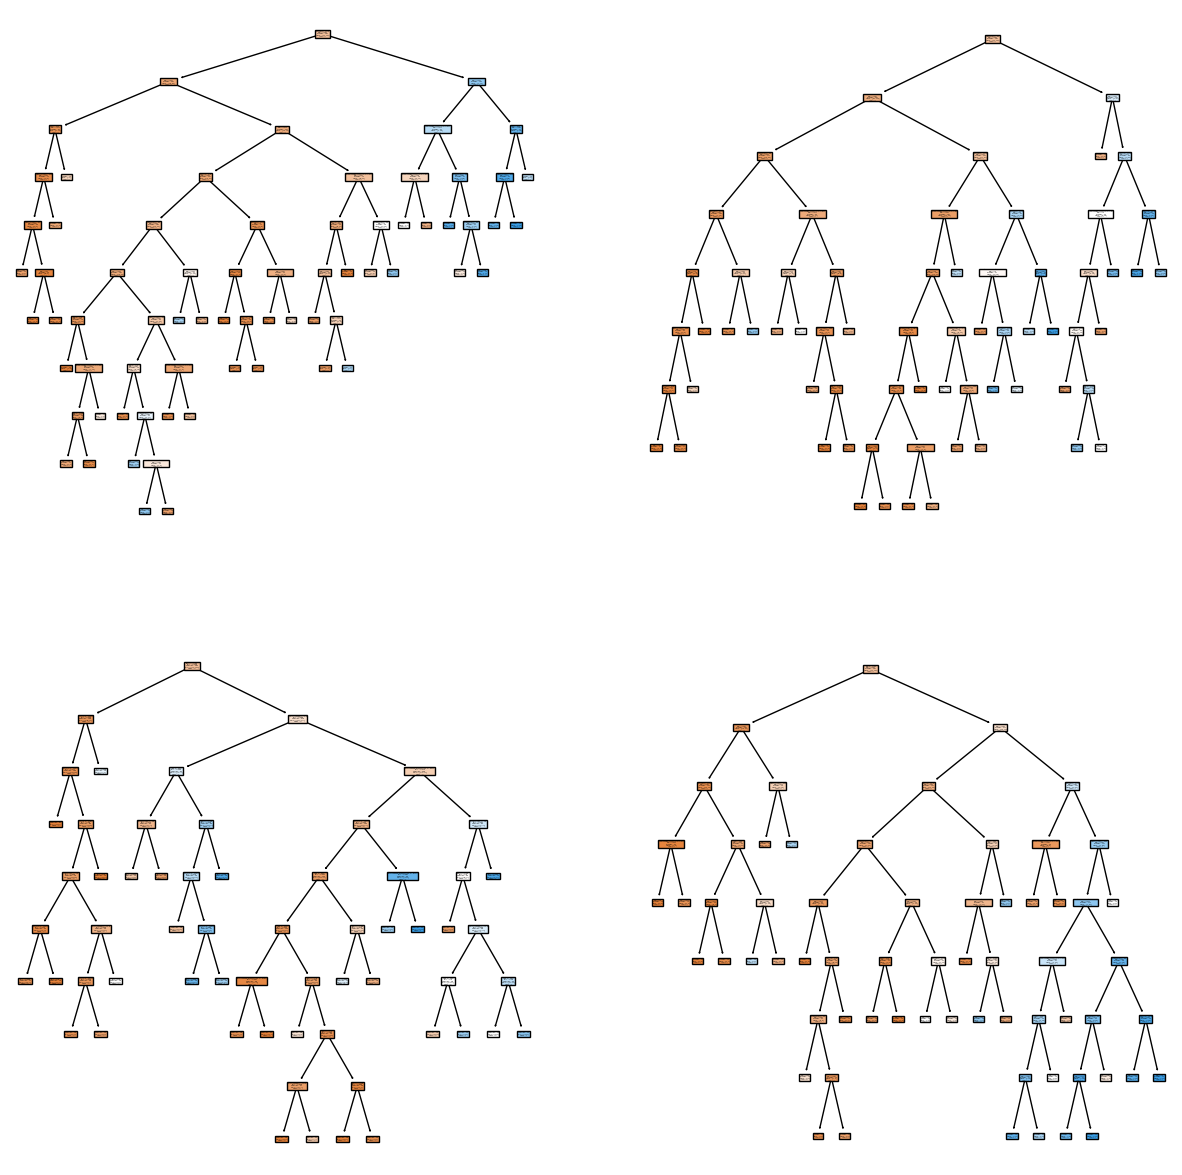

In [89]:
fig, axis = plt.subplots (2, 2, figsize = (15, 15))

tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names= list(X_train.columns), class_names= ['0', '1', '2'], filled= True)

In [90]:
from pickle import dump

dump(model, open("../models/random_forest_bootst-False_classwei-None_crit-gini_maxdepth-None_maxfeature_sqrt_minleaf-10_minsplit-2_nestim-100_11.pk", "wb"))

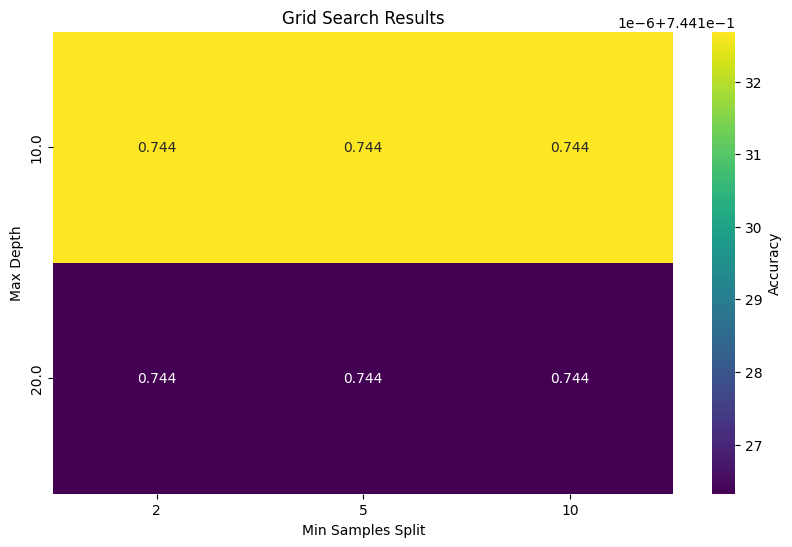

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
# Obtener los resultados de la búsqueda en la cuadrícula
results = grid.cv_results_

# Filtrar los resultados para obtener solo los puntajes de validación
scores = results['mean_test_score']

# Obtener los mejores hiperparámetros
best_params = grid.best_params_

# Crear un DataFrame con los resultados
df_results = pd.DataFrame(results['params'])
df_results['Score'] = scores
df_results
# # Filtrar el DataFrame para obtener solo las filas con los mejores hiperparámetros
df_best_results = df_results[df_results[list(best_params.keys())].eq(list(best_params.values())).all(axis=1)]

plt.figure(figsize=(10, 6))
sns.heatmap(df_results.pivot_table(index='max_depth', columns='min_samples_split', values='Score', aggfunc='mean'),
            annot=True, cmap='viridis', fmt='.3f', cbar_kws={'label': 'Accuracy'})
plt.title('Grid Search Results')
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.show()

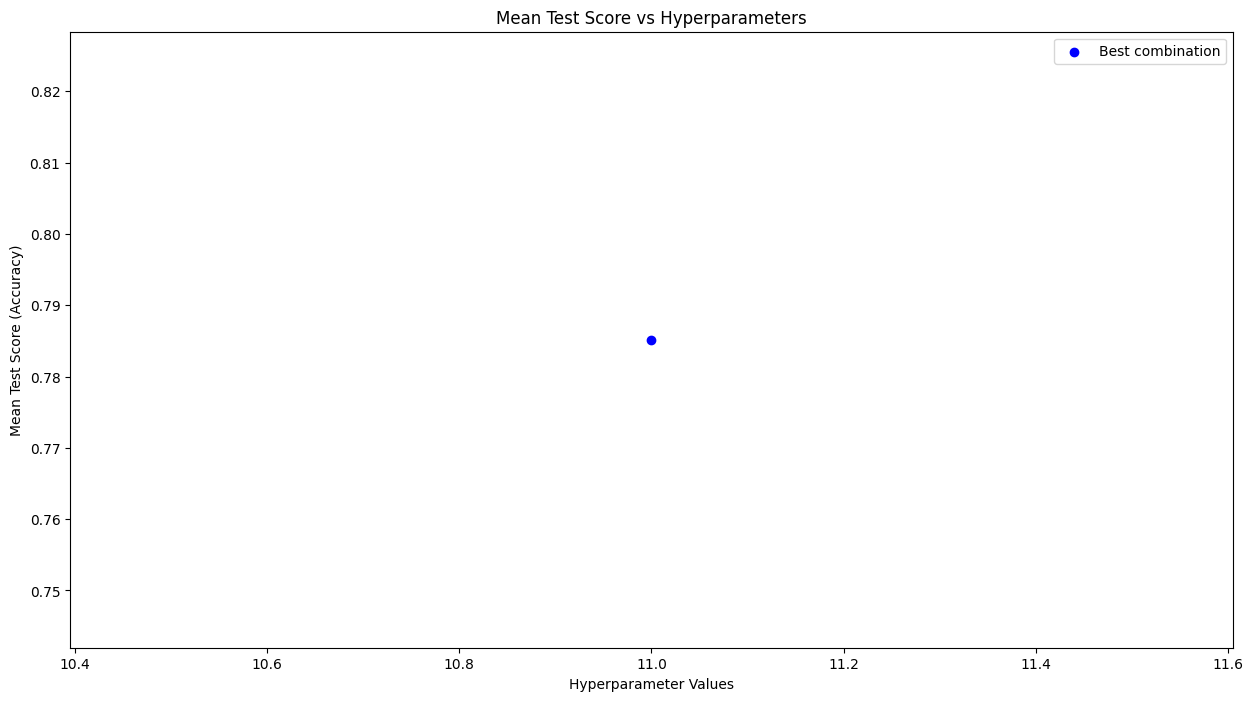

In [123]:
# Create a single graph
fig, ax = plt.subplots(figsize=(15, 8))

hyperparams_to_plot = list(best_params.keys())

for param_to_plot in hyperparams_to_plot:
    # Check if expected column exists in cv_results
    if f'param_{param_to_plot}' in df_results.columns:
        unique_values = df_results[f'param_{param_to_plot}'].unique()

        for param_value in unique_values:
            param_results = df_results[df_results[f'param_{param_to_plot}'] == param_value]

            # Plot results only if there is data for the hyperparameter
            if not param_results.empty:
                ax.plot(param_results[f'param_{param_to_plot}'], param_results['mean_test_score'], marker='o', label=f'{param_to_plot}={param_value}')

# Marking the best combination
ax.scatter(best_params[param_to_plot], grid.best_score_, color='blue', label='Best combination')

ax.set_title('Mean Test Score vs Hyperparameters')
ax.set_xlabel('Hyperparameter Values')
ax.set_ylabel('Mean Test Score (Accuracy)')
ax.legend()

plt.show()